In [63]:
import numpy as np 
import pandas as pd
import os, sys
from time import time
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers, callbacks
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Convolution2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models, layers

In [64]:
folder = r"E:\Capstone - Image docs\Regression with images\Zinc"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

In [65]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find(".")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    #x = x.reshape((3, 128, 128))
    
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    
   
print("All images to array!")

Files in train_files: 350
All images to array!


In [66]:
from sklearn.model_selection import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 280, Val set size: 35, Test set size: 35


In [67]:
datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(X_val)

In [73]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 96)       

In [69]:
from keras import backend as K
def rmse(y_true, y_pred): 
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [16]:
model.compile(loss=rmse, optimizer='rmsprop', metrics=['mae'])

In [18]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=10), 
                    samples_per_epoch=len(X_train),  
                    nb_epoch=500, 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=10),
                    nb_val_samples=len(X_val),
                    verbose=1)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., verbose=1, steps_per_epoch=28, epochs=500, validation_steps=35)`
  


Epoch 1/500
28/28 [==============================] - 14s 511ms/step - loss: 13.4081 - mae: 11.1401 - val_loss: 11.6928 - val_mae: 9.5374
Epoch 2/500
28/28 [==============================] - 15s 553ms/step - loss: 15.0266 - mae: 12.2070 - val_loss: 9.4632 - val_mae: 6.0048
Epoch 3/500
28/28 [==============================] - 16s 573ms/step - loss: 14.6983 - mae: 11.9788 - val_loss: 14.5013 - val_mae: 13.1804
Epoch 4/500
28/28 [==============================] - 16s 580ms/step - loss: 14.2287 - mae: 11.7197 - val_loss: 7.3339 - val_mae: 7.6550
Epoch 5/500
28/28 [==============================] - 16s 582ms/step - loss: 13.3652 - mae: 10.7012 - val_loss: 10.0841 - val_mae: 9.5413
Epoch 6/500
28/28 [==============================] - 16s 576ms/step - loss: 13.0009 - mae: 10.6807 - val_loss: 7.1097 - val_mae: 7.5903
Epoch 7/500
28/28 [==============================] - 16s 583ms/step - loss: 14.3174 - mae: 11.8143 - val_loss: 5.1298 - val_mae: 7.0242
Epoch 8/500
28/28 [=========================

28/28 [==============================] - 16s 577ms/step - loss: 13.0437 - mae: 10.6611 - val_loss: 8.7672 - val_mae: 8.6889
Epoch 61/500
28/28 [==============================] - 16s 578ms/step - loss: 12.8616 - mae: 10.5562 - val_loss: 14.0374 - val_mae: 12.5952
Epoch 62/500
28/28 [==============================] - 17s 591ms/step - loss: 13.0423 - mae: 10.7432 - val_loss: 5.8835 - val_mae: 7.1030
Epoch 63/500
28/28 [==============================] - 16s 583ms/step - loss: 12.3951 - mae: 10.0461 - val_loss: 9.2710 - val_mae: 7.6179
Epoch 64/500
28/28 [==============================] - 16s 585ms/step - loss: 12.4250 - mae: 10.2816 - val_loss: 11.3797 - val_mae: 7.0529
Epoch 65/500
28/28 [==============================] - 16s 578ms/step - loss: 12.1942 - mae: 9.9326 - val_loss: 6.9305 - val_mae: 6.8978
Epoch 66/500
28/28 [==============================] - 16s 589ms/step - loss: 12.9768 - mae: 10.7137 - val_loss: 9.7806 - val_mae: 6.9114
Epoch 67/500
28/28 [==============================] 

28/28 [==============================] - 16s 573ms/step - loss: 11.8525 - mae: 9.8649 - val_loss: 10.2937 - val_mae: 5.4841
Epoch 120/500
28/28 [==============================] - 16s 579ms/step - loss: 12.4246 - mae: 10.1850 - val_loss: 2.5358 - val_mae: 5.3228
Epoch 121/500
28/28 [==============================] - 16s 582ms/step - loss: 12.0723 - mae: 9.9269 - val_loss: 2.8275 - val_mae: 4.6621
Epoch 122/500
28/28 [==============================] - 16s 574ms/step - loss: 11.8736 - mae: 9.7148 - val_loss: 5.9441 - val_mae: 6.3179
Epoch 123/500
28/28 [==============================] - 16s 581ms/step - loss: 11.9054 - mae: 9.6337 - val_loss: 4.9145 - val_mae: 5.6462
Epoch 124/500
28/28 [==============================] - 16s 579ms/step - loss: 11.6857 - mae: 9.1941 - val_loss: 7.5120 - val_mae: 5.4659
Epoch 125/500
28/28 [==============================] - 16s 582ms/step - loss: 11.5242 - mae: 9.3578 - val_loss: 8.5187 - val_mae: 7.1959
Epoch 126/500
28/28 [==============================] 

Epoch 179/500
28/28 [==============================] - 16s 580ms/step - loss: 11.7406 - mae: 9.7192 - val_loss: 9.3089 - val_mae: 6.7992
Epoch 180/500
28/28 [==============================] - 16s 583ms/step - loss: 12.0750 - mae: 9.6263 - val_loss: 7.7111 - val_mae: 6.4942
Epoch 181/500
28/28 [==============================] - 17s 595ms/step - loss: 11.2337 - mae: 9.3151 - val_loss: 6.2572 - val_mae: 5.9225
Epoch 182/500
28/28 [==============================] - 16s 586ms/step - loss: 11.6983 - mae: 9.4439 - val_loss: 9.0923 - val_mae: 9.1090
Epoch 183/500
28/28 [==============================] - 16s 578ms/step - loss: 12.0066 - mae: 10.1667 - val_loss: 11.5531 - val_mae: 11.4621
Epoch 184/500
28/28 [==============================] - 16s 586ms/step - loss: 11.2681 - mae: 9.1444 - val_loss: 7.5197 - val_mae: 6.0084
Epoch 185/500
28/28 [==============================] - 16s 579ms/step - loss: 11.9982 - mae: 9.6991 - val_loss: 5.3660 - val_mae: 5.3064
Epoch 186/500
28/28 [=================

28/28 [==============================] - 17s 589ms/step - loss: 11.2930 - mae: 9.1924 - val_loss: 4.2637 - val_mae: 4.5184
Epoch 239/500
28/28 [==============================] - 16s 581ms/step - loss: 11.6384 - mae: 9.4491 - val_loss: 7.6321 - val_mae: 6.2180
Epoch 240/500
28/28 [==============================] - 16s 576ms/step - loss: 12.2379 - mae: 9.9918 - val_loss: 6.5680 - val_mae: 7.2044
Epoch 241/500
28/28 [==============================] - 16s 576ms/step - loss: 10.8524 - mae: 8.7678 - val_loss: 7.9412 - val_mae: 5.9663
Epoch 242/500
28/28 [==============================] - 16s 583ms/step - loss: 10.8968 - mae: 9.0817 - val_loss: 9.2055 - val_mae: 9.8170
Epoch 243/500
28/28 [==============================] - 16s 584ms/step - loss: 10.9652 - mae: 9.0302 - val_loss: 7.2999 - val_mae: 7.6376
Epoch 244/500
28/28 [==============================] - 16s 577ms/step - loss: 11.4991 - mae: 9.4439 - val_loss: 6.6909 - val_mae: 4.6304
Epoch 245/500
28/28 [==============================] - 

Epoch 298/500
28/28 [==============================] - 16s 582ms/step - loss: 10.6717 - mae: 8.6270 - val_loss: 7.2149 - val_mae: 6.5675
Epoch 299/500
28/28 [==============================] - 16s 578ms/step - loss: 11.7685 - mae: 9.8549 - val_loss: 10.1443 - val_mae: 8.0233
Epoch 300/500
28/28 [==============================] - 16s 582ms/step - loss: 10.6186 - mae: 8.4649 - val_loss: 9.3754 - val_mae: 5.9749
Epoch 301/500
28/28 [==============================] - 16s 584ms/step - loss: 11.8493 - mae: 9.9705 - val_loss: 10.1742 - val_mae: 7.2973
Epoch 302/500
28/28 [==============================] - 16s 582ms/step - loss: 11.1400 - mae: 9.0056 - val_loss: 7.1563 - val_mae: 5.3201
Epoch 303/500
28/28 [==============================] - 17s 595ms/step - loss: 11.0912 - mae: 9.1548 - val_loss: 11.3424 - val_mae: 6.9992
Epoch 304/500
28/28 [==============================] - 16s 579ms/step - loss: 11.2435 - mae: 9.1739 - val_loss: 3.0051 - val_mae: 5.2657
Epoch 305/500
28/28 [=================

Epoch 358/500
28/28 [==============================] - 16s 578ms/step - loss: 10.1351 - mae: 8.1396 - val_loss: 8.4456 - val_mae: 7.9217
Epoch 359/500
28/28 [==============================] - 16s 580ms/step - loss: 10.1254 - mae: 8.3081 - val_loss: 5.0120 - val_mae: 4.7919
Epoch 360/500
28/28 [==============================] - 16s 575ms/step - loss: 11.3002 - mae: 9.1726 - val_loss: 9.7032 - val_mae: 8.1983
Epoch 361/500
28/28 [==============================] - 16s 581ms/step - loss: 10.9663 - mae: 9.0861 - val_loss: 5.4585 - val_mae: 4.6900
Epoch 362/500
28/28 [==============================] - 16s 587ms/step - loss: 11.3014 - mae: 9.1634 - val_loss: 7.0312 - val_mae: 5.6576
Epoch 363/500
28/28 [==============================] - 16s 576ms/step - loss: 12.0153 - mae: 9.6022 - val_loss: 3.5254 - val_mae: 4.5213
Epoch 364/500
28/28 [==============================] - 16s 584ms/step - loss: 10.6877 - mae: 8.8826 - val_loss: 6.8986 - val_mae: 4.7279
Epoch 365/500
28/28 [====================

Epoch 418/500
28/28 [==============================] - 16s 582ms/step - loss: 10.9126 - mae: 9.0841 - val_loss: 4.0977 - val_mae: 4.4092
Epoch 419/500
28/28 [==============================] - 16s 579ms/step - loss: 10.9096 - mae: 8.9808 - val_loss: 10.0135 - val_mae: 4.7193
Epoch 420/500
28/28 [==============================] - 16s 587ms/step - loss: 10.6554 - mae: 8.6972 - val_loss: 2.7605 - val_mae: 4.6654
Epoch 421/500
28/28 [==============================] - 16s 585ms/step - loss: 10.4898 - mae: 8.4939 - val_loss: 3.9976 - val_mae: 5.1853
Epoch 422/500
28/28 [==============================] - 16s 581ms/step - loss: 10.4427 - mae: 8.2673 - val_loss: 6.3325 - val_mae: 4.9077
Epoch 423/500
28/28 [==============================] - 16s 582ms/step - loss: 10.9327 - mae: 8.9594 - val_loss: 5.4986 - val_mae: 5.1126
Epoch 424/500
28/28 [==============================] - 16s 575ms/step - loss: 10.9039 - mae: 9.0410 - val_loss: 2.3102 - val_mae: 4.9560
Epoch 425/500
28/28 [===================

Epoch 478/500
28/28 [==============================] - 17s 591ms/step - loss: 10.9961 - mae: 9.1674 - val_loss: 5.2159 - val_mae: 5.8954
Epoch 479/500
28/28 [==============================] - 16s 577ms/step - loss: 11.3154 - mae: 9.3060 - val_loss: 9.1722 - val_mae: 7.7159
Epoch 480/500
28/28 [==============================] - 16s 578ms/step - loss: 10.1216 - mae: 8.1097 - val_loss: 8.6547 - val_mae: 7.3543
Epoch 481/500
28/28 [==============================] - 16s 583ms/step - loss: 10.6316 - mae: 8.5500 - val_loss: 8.5263 - val_mae: 8.5340
Epoch 482/500
28/28 [==============================] - 16s 581ms/step - loss: 10.7840 - mae: 8.8441 - val_loss: 7.9736 - val_mae: 5.9021
Epoch 483/500
28/28 [==============================] - 16s 584ms/step - loss: 10.3456 - mae: 8.3938 - val_loss: 8.5862 - val_mae: 5.6823
Epoch 484/500
28/28 [==============================] - 16s 576ms/step - loss: 10.9825 - mae: 8.8709 - val_loss: 3.4406 - val_mae: 4.7490
Epoch 485/500
28/28 [====================

In [19]:

predictions = model.predict(X_test)

In [20]:
print("{0:5} {1:10} {2:8}".format("True", "Predicted", "Error"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10} {2:8}".format(y_test[i], int(predictions[i]), abs(y_test[i] - int(predictions[i]))))
    

True  Predicted  Error   
   68         74        6
   68         69        1
   71         73        2
   63         59        4
   67         61        6
   68         67        1
   70         80       10
   65         68        3
   60         59        1
   62         64        2


In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Given values 
Y_true = [68,68,71,63,67,68,70,65,60,62]  # Y_true = Y (original values) 
  
# calculated values 
Y_pred = [74,69,73,59,61,67,80,68,59,64]  # Y_pred = Y' 
# Calculation of Mean Squared Error (MSE) 
a= sqrt(mean_squared_error(Y_true,Y_pred))
b= mean_absolute_error(Y_true,Y_pred)
print('root_mean_squared_error is : {:.4f}' .format(a))
print('mean_absolute_error is : {:.4f}' .format(b))

root_mean_squared_error is : 4.5607
mean_absolute_error is : 3.6000


In [22]:
# r squared values 
import numpy as np
correlation_matrix = np.corrcoef(Y_true,Y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.6239958644730578


In [102]:
#Feature extraction
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

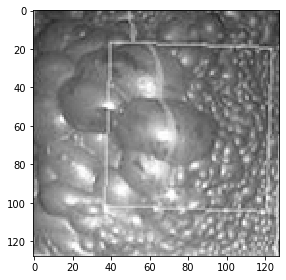

In [103]:
image = imread(r"E:\Capstone - Image docs\Zinc\32.503.jpg", as_gray=True)
imshow(image)


In [104]:
#checking image shape 
image.shape, image

((128, 128),
 array([[0.61426549, 0.34367725, 0.28680314, ..., 0.56804706, 0.74059608,
         0.66383137],
        [0.64171647, 0.39045333, 0.30109059, ..., 0.31706667, 0.33667451,
         0.33834118],
        [0.63751216, 0.29633569, 0.28932588, ..., 0.24647843, 0.1876549 ,
         0.1854    ],
        ...,
        [0.54030627, 0.5873651 , 0.54422784, ..., 0.88175843, 0.90862118,
         0.53607216],
        [0.58344353, 0.62265922, 0.62658078, ..., 0.78232039, 0.92038588,
         0.66940549],
        [0.77364314, 0.79325098, 0.81678039, ..., 0.74310471, 0.88901333,
         0.72038588]]))

In [108]:
import numpy as np
from skimage.io import imread, imshow
image = imread(r'E:\Capstone - Image docs\Zinc\32.503.jpg', as_gray=True) 

# shape of the image
print('\n\nShape of the image = ',image.shape)

# create features
features = np.reshape(image, (128,128))

# shape of feature array
print('\n\nShape of the feature array = ',features.shape)

print('\n\nFeature Array\n\n',features)



Shape of the image =  (128, 128)


Shape of the feature array =  (128, 128)


Feature Array

 [[0.61426549 0.34367725 0.28680314 ... 0.56804706 0.74059608 0.66383137]
 [0.64171647 0.39045333 0.30109059 ... 0.31706667 0.33667451 0.33834118]
 [0.63751216 0.29633569 0.28932588 ... 0.24647843 0.1876549  0.1854    ]
 ...
 [0.54030627 0.5873651  0.54422784 ... 0.88175843 0.90862118 0.53607216]
 [0.58344353 0.62265922 0.62658078 ... 0.78232039 0.92038588 0.66940549]
 [0.77364314 0.79325098 0.81678039 ... 0.74310471 0.88901333 0.72038588]]


In [117]:
image = imread(r'E:\Capstone - Image docs\Zinc\32.503.jpg')
feature_matrix = np.zeros((128,128)) 
feature_matrix.shape

(128, 128)

In [126]:
features = np.reshape(feature_matrix, (128*128)) 
features.shape

(16384,)

In [113]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

In [125]:
# shape of feature array
print('\nShape of the feature array = ',features.shape)
print('\nFeature Array\n',features)


Shape of the feature array =  (16384,)

Feature Array
 [153.          84.          70.         ... 183.         221.33333333
 178.33333333]


Method 3: Extracting Edge Features

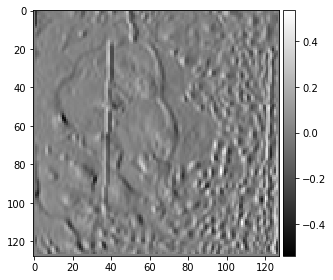

In [123]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread(r'E:\Capstone - Image docs\Zinc\32.503.jpg', as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

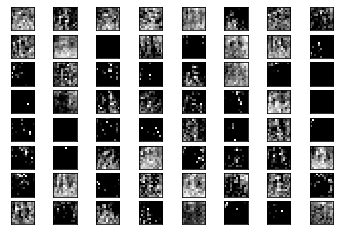

In [98]:
#feature map visualization
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_name = 'conv2d_16' #The convolution block to be visualized

model = Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)

# Perpare the image
image = load_img(r"E:\Capstone - Image docs\Zinc\32.503.jpg", target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Apply the model to the image
feature_maps = model.predict(image)

square = 8
index = 1
for _ in range(square):
	for _ in range(square):
        
		ax = plt.subplot(square, square, index)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, index-1], cmap='gray')
		index += 1
        
plt.show()

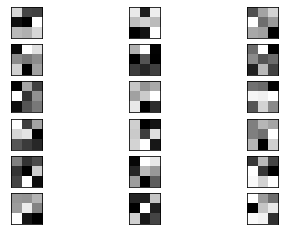

In [99]:

import matplotlib.pyplot as plt
import numpy as np


layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_name = 'conv2d_16' #The convolution block to be visualized
filter_index = 0  # The filter in the block to be visualized

# Grab the filters and biases for that layer
filters, biases = layer_dict[layer_name].get_weights()

# Normalize filter values to a range of 0 to 1 so we can visualize them
f_min, f_max = np.amin(filters), np.amax(filters)
filters = (filters - f_min) / (f_max - f_min)

# Plot first few filters
n_filters, index = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    
    # Plot each channel separately
    for j in range(3):

        ax = plt.subplot(n_filters, 3, index)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[:, :, j], cmap='gray')
        index += 1
        
plt.show()